### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [139]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student:

- If GPA values between 0 and 2 will be labeled 'Low',
- Values between 2 and 3.5 will be 'Medium',
- And values between 3.5 and 5 will be 'High'.


In [141]:
data["Profile"] = pd.cut(data["GPA"], bins=[0, 2, 3.5, 5], labels=["Low", "Medium", "High"])
data["Profile"]

,Profile
0,Medium
1,Medium
2,Low
3,Medium
4,Low
...,...
2387,Medium
2388,Medium
2389,Low
2390,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

<Axes: ylabel='count'>

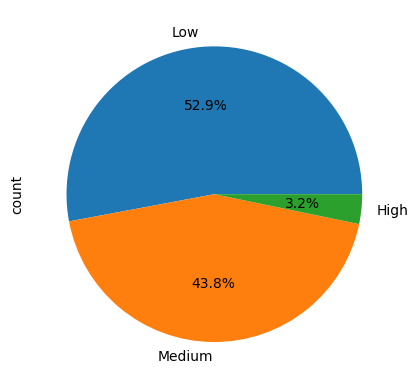

In [142]:
data["Profile"].value_counts().plot(kind="pie", autopct="%1.1f%%")


### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [143]:
data["iIdProfile"] = LabelEncoder().fit_transform(data["Profile"])
data["iIdProfile"]

,iIdProfile
0,2
1,2
2,1
3,2
4,1
...,...
2387,2
2388,2
2389,1
2390,1


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [144]:
oModelDF = data.drop(columns=["StudentID", "Age", "Gender", "Ethnicity" ])

oX = oModelDF.drop(columns=["Profile", "iIdProfile"])
oY = oModelDF["iIdProfile"]
X_Train, X_Test, y_Train, y_Test = train_test_split(oX, oY, test_size=0.2, random_state=42)

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [145]:
scaler = StandardScaler()

X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [146]:
model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [147]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [148]:
history = model.fit(X_Train, y_Train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6562 - mae: 0.6134 - val_loss: 0.2667 - val_mae: 0.3606
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2465 - mae: 0.3491 - val_loss: 0.2203 - val_mae: 0.3305
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2000 - mae: 0.3072 - val_loss: 0.1779 - val_mae: 0.2842
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1620 - mae: 0.2710 - val_loss: 0.1466 - val_mae: 0.2749
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1421 - mae: 0.2492 - val_loss: 0.1251 - val_mae: 0.2234
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1212 - mae: 0.2266 - val_loss: 0.1097 - val_mae: 0.2170
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1153 - mae: 0.2174 - val_loss: 0.1099 - val_mae: 0.2200
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0944 - mae: 0.1929 - val_loss: 0.1115 - val_mae: 0.2273
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

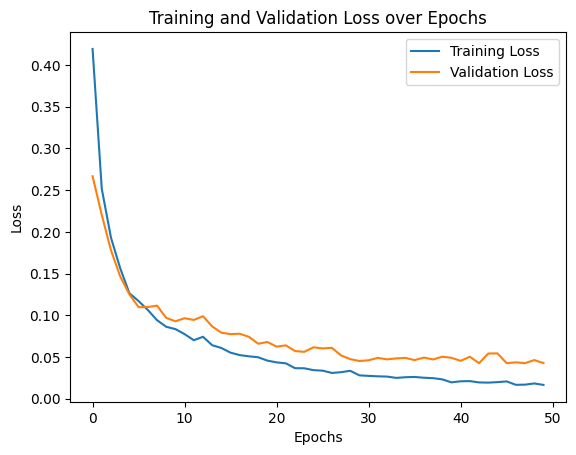

In [149]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

Text(0.5, 1.0, 'Training and Validation MAE over Epochs')

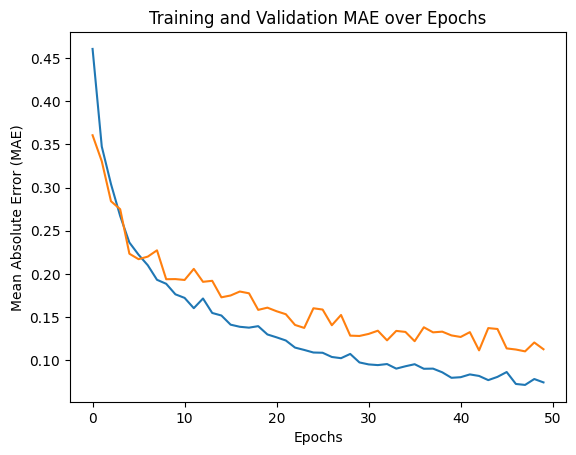

In [150]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')

### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [151]:
loss, mae = model.evaluate(X_Test, y_Test)
print(f'Loss: {loss}, MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0693 - mae: 0.1234 
Loss: 0.0666804388165474, MAE: 0.12153734266757965


### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.5996 - mae: 0.5652 - val_loss: 0.2308 - val_mae: 0.3510
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2103 - mae: 0.3159 - val_loss: 0.1604 - val_mae: 0.2867
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1499 - mae: 0.2550 - val_loss: 0.1251 - val_mae: 0.2405
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1215 - mae: 0.2256 - val_loss: 0.1177 - val_mae: 0.2308
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0914 - mae: 0.1957 - val_loss: 0.0983 - val_mae: 0.2105
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0841 - mae: 0.1790 - val_loss: 0.0838 - val_mae: 0.1773
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0959 - mae: 0.1901 - val_loss: 0.0794 - val_mae: 0.1748
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0681 - mae: 0.1608 - val_loss: 0.0856 - val_mae: 0.2053
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

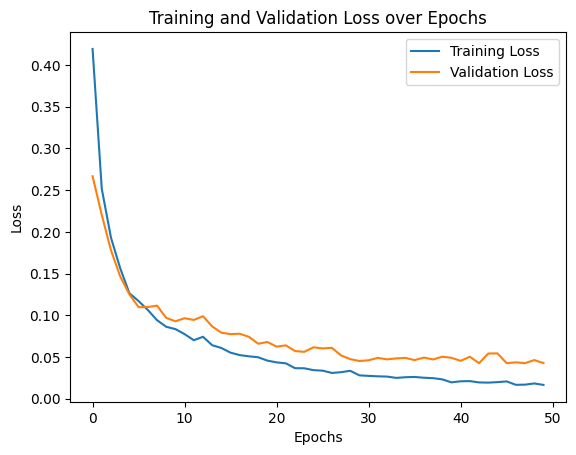

In [152]:
model2 = Sequential()
model2.add(Dense(128, input_dim=11, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

history2 = model2.fit(X_Train, y_Train, epochs=50, batch_size=10, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

In [153]:
loss, mae = model2.evaluate(X_Test, y_Test)
print(f'Loss: {loss}, MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0809 - mae: 0.1890 
Loss: 0.08481959253549576, MAE: 0.18549181520938873


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6027 - mae: 0.5594 - val_loss: 0.2125 - val_mae: 0.3311
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1631 - mae: 0.2688 - val_loss: 0.1556 - val_mae: 0.2459
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1242 - mae: 0.2217 - val_loss: 0.1171 - val_mae: 0.2374
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1013 - mae: 0.2043 - val_loss: 0.0967 - val_mae: 0.2007
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0973 - mae: 0.1868 - val_loss: 0.1022 - val_mae: 0.2186
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0615 - mae: 0.1574 - val_loss: 0.0905 - val_mae: 0.1980
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0693 - mae: 0.1667 - val_loss: 0.0729 - val_mae: 0.1655
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0705 - mae: 0.1546 - val_loss: 0.0742 - val_mae: 0.1637
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0531 

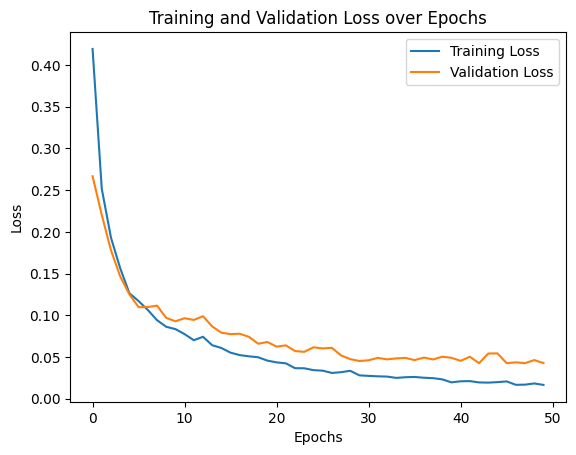

In [154]:
oModelDF2 = data.drop(columns=["StudentID", "Age", "Gender", "Ethnicity", "ParentalSupport" ])

oX = oModelDF2.drop(columns=["Profile", "iIdProfile"])
oY = oModelDF2["iIdProfile"]
X_TrainModelo3, X_TestModelo3, y_TrainModelo3, y_TestModelo3 = train_test_split(oX, oY, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_TrainModelo3 = scaler.fit_transform(X_TrainModelo3)
X_TestModelo3 = scaler.transform(X_TestModelo3)

model3 = Sequential()
model3.add(Dense(128, input_dim=10, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(1))

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

history3 = model3.fit(X_TrainModelo3, y_TrainModelo3, epochs=50, batch_size=10, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

In [155]:
loss, mae = model3.evaluate(X_TestModelo3, y_TestModelo3)
print(f'Loss: {loss}, MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0604 - mae: 0.1191 
Loss: 0.06959754973649979, MAE: 0.1245928630232811


In [156]:
# Extraer datos de cada modelo
results = {
    'Modelo': ['Model 1', 'Model 2', 'Model 3'],
    'Loss Entrenamiento': [history.history['loss'][-1], history2.history['loss'][-1], history3.history['loss'][-1]],
    'Loss Validación': [history.history['val_loss'][-1], history2.history['val_loss'][-1], history3.history['val_loss'][-1]],
    'MAE Entrenamiento': [history.history['mae'][-1], history2.history['mae'][-1], history3.history['mae'][-1]],
    'MAE Validación': [history.history['val_mae'][-1], history2.history['val_mae'][-1], history3.history['val_mae'][-1]]
}

# Crear un DataFrame para mostrar los resultados
df_results = pd.DataFrame(results)
print("Resultados de entrenamiento y validación para cada modelo:")
print(df_results)

Resultados de entrenamiento y validación para cada modelo:
    Modelo  Loss Entrenamiento  Loss Validación  MAE Entrenamiento  \
0  Model 1            0.016518         0.042735           0.074263   
1  Model 2            0.016917         0.057518           0.074304   
2  Model 3            0.021618         0.044596           0.073431   

   MAE Validación  
0        0.112671  
1        0.182192  
2        0.123303  


In [157]:
sample_data = X_Test[:5]# Selecciona los primeros 5 estudiantes

# Realizar predicciones con cada modelo
predictions1 = model.predict(sample_data)
predictions2 = model2.predict(sample_data)
predictions3 = model3.predict(X_TestModelo3[:5])

# Crear una tabla con los resultados
pred_df = pd.DataFrame({
    'Alumno': range(1, 6),
    'Real': y_Test[:5].ravel(),
    'Predicción Modelo 1': predictions1.ravel(),
    'Predicción Modelo 2': predictions2.ravel(),
    'Predicción Modelo 3': predictions3.ravel()
})

print("Predicciones de los modelos para 5 alumnos:")
print(pred_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicciones de los modelos para 5 alumnos:
   Alumno  Real  Predicción Modelo 1  Predicción Modelo 2  Predicción Modelo 3
0       1     1             1.094338             0.984041             1.093737
1       2     2             2.279182             1.945130             2.193059
2       3     2             1.922290             1.864756             1.878268
3       4     0            -0.110881            -0.131891            -0.407121
4       5     1             0.972081             1.220026             1.144930


<ipython-input-157-b138769cb435>:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'Real': y_Test[:5].ravel(),


# Experiment 1: A single Dense Hidden Layer

In [161]:
oModelDF = data.drop(columns=["StudentID", "Age", "Gender", "Ethnicity" ])

oX = oModelDF.drop(columns=["Profile", "iIdProfile"])
oY = oModelDF["iIdProfile"]
X_Train, X_Test, y_Train, y_Test = train_test_split(oX, oY, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

In [162]:
model4 = Sequential()
model4.add(Dense(64, input_dim=11, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

history4 = model4.fit(X_Train, y_Train, epochs=50, batch_size=10, validation_split=0.2)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5019 - mae: 0.9927 - val_loss: 0.3066 - val_mae: 0.3868
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2819 - mae: 0.3614 - val_loss: 0.2412 - val_mae: 0.3298
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2070 - mae: 0.3133 - val_loss: 0.2113 - val_mae: 0.3256
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1777 - mae: 0.2862 - val_loss: 0.1698 - val_mae: 0.2990
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1588 - mae: 0.2699 - val_loss: 0.1471 - val_mae: 0.2714
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1202 - mae: 0.2306 - val_loss: 0.1379 - val_mae: 0.2673
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1212 - mae: 0.2264 - val_loss: 0.1118 - val_mae: 0.2181
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1116 - mae: 0.2159 - val_loss: 0.1058 - val_mae: 0.2116
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0810 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

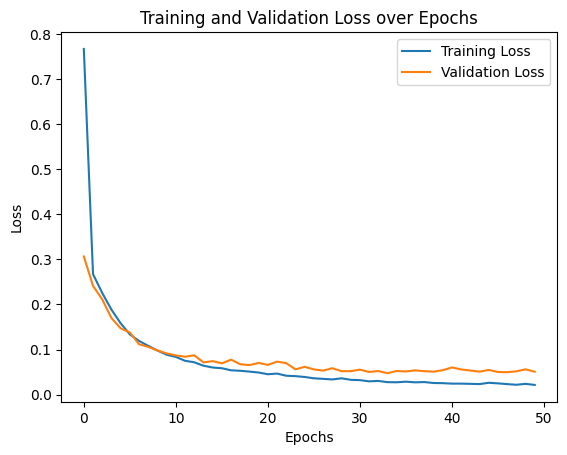

In [163]:
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt

In [164]:
loss, mae = model4.evaluate(X_Test, y_Test)
print(f'Loss: {loss}, MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0641 - mae: 0.1312 
Loss: 0.07535023242235184, MAE: 0.1400592178106308


# Experiment 2: A set of three Dense Hidden Layers

In [165]:
model5 = Sequential()
model5.add(Dense(64, input_dim=11, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1))

model5.compile(optimizer='adam', loss='mse', metrics=['mae'])

history5 = model5.fit(X_Train, y_Train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5209 - mae: 0.5297 - val_loss: 0.2262 - val_mae: 0.3234
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1952 - mae: 0.2947 - val_loss: 0.2030 - val_mae: 0.3360
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1427 - mae: 0.2582 - val_loss: 0.1339 - val_mae: 0.2437
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0982 - mae: 0.2033 - val_loss: 0.1066 - val_mae: 0.2121
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0922 - mae: 0.1847 - val_loss: 0.1108 - val_mae: 0.1976
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0655 - mae: 0.1515 - val_loss: 0.0963 - val_mae: 0.1819
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0660 - mae: 0.1481 - val_loss: 0.0801 - val_mae: 0.1703
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0550 - mae: 0.1348 - val_loss: 0.0759 - val_mae: 0.1581
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [166]:
loss, mae = model5.evaluate(X_Test, y_Test)
print(f'Loss: {loss}, MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0767 - mae: 0.1219 
Loss: 0.0728926733136177, MAE: 0.12480045109987259


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

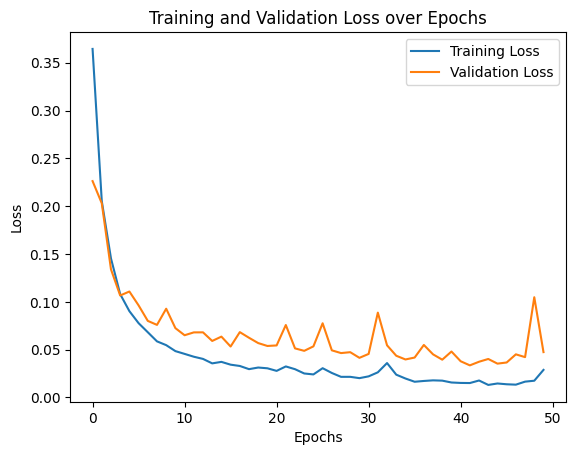

In [167]:
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt

# Experiment 3: Add a dropout layer after each Dense Hidden Layer

In [168]:
model6 = Sequential()
model6.add(Dense(64, input_dim=11, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(32, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(32, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(1))

model6.compile(optimizer='adam', loss='mse', metrics=['mae'])

history6 = model6.fit(X_Train, y_Train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3743 - mae: 0.9849 - val_loss: 0.5638 - val_mae: 0.6165
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6739 - mae: 0.6286 - val_loss: 0.4149 - val_mae: 0.4864
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4721 - mae: 0.5130 - val_loss: 0.2991 - val_mae: 0.4129
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3993 - mae: 0.4658 - val_loss: 0.3034 - val_mae: 0.4177
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3175 - mae: 0.4221 - val_loss: 0.2424 - val_mae: 0.3794
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2916 - mae: 0.4053 - val_loss: 0.2384 - val_mae: 0.3755
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2874 - mae: 0.4101 - val_loss: 0.2113 - val_mae: 0.3419
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2666 - mae: 0.3782 - val_loss: 0.1980 - val_mae: 0.3351
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

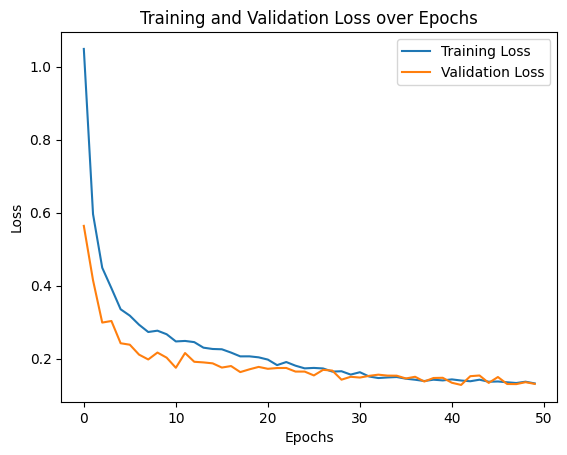

In [169]:
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt

In [170]:
loss, mae = model6.evaluate(X_Test, y_Test)
print(f'Loss: {loss}, MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1310 - mae: 0.2241 
Loss: 0.12900617718696594, MAE: 0.220723956823349


# Experiment 4: Add a Batch Normalization Layer after each Dropout Layer.

In [171]:
model7 = Sequential()
model7.add(Dense(64, input_dim=11, activation='relu'))
model7.add(Dense(32, activation='relu'))
model7.add(Dropout(0.5))
model7.add(BatchNormalization())
model7.add(Dense(32, activation='relu'))
model7.add(Dropout(0.5))
model7.add(BatchNormalization())
model7.add(Dense(32, activation='relu'))
model7.add(Dropout(0.5))
model7.add(BatchNormalization())
model7.add(Dense(1))

model7.compile(optimizer='adam', loss='mse', metrics=['mae'])

history7 = model7.fit(X_Train, y_Train, epochs=50, batch_size=10, validation_split=0.2)



Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.3264 - mae: 1.4818 - val_loss: 0.7976 - val_mae: 0.7290
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3890 - mae: 0.9378 - val_loss: 0.4803 - val_mae: 0.5237
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0002 - mae: 0.7992 - val_loss: 0.3785 - val_mae: 0.4808
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7322 - mae: 0.6811 - val_loss: 0.3477 - val_mae: 0.4733
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6028 - mae: 0.6270 - val_loss: 0.3267 - val_mae: 0.4626
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5151 - mae: 0.5817 - val_loss: 0.3172 - val_mae: 0.4558
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4659 - mae: 0.5584 - val_loss: 0.3148 - val_mae: 0.4694
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4337 - mae: 0.5368 - val_loss: 0.3195 - val_mae: 0.4704
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

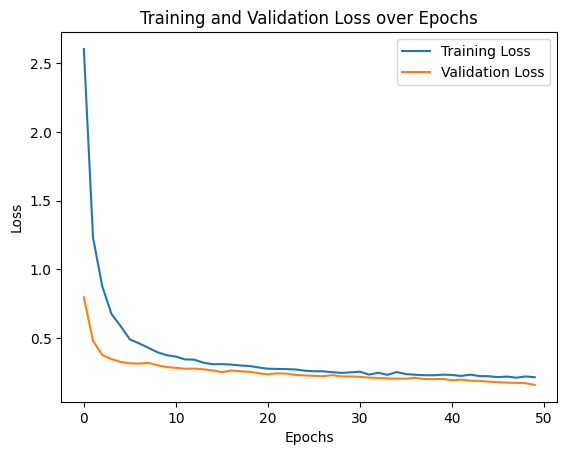

In [172]:
plt.plot(history7.history['loss'], label='Training Loss')
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt

In [173]:
loss, mae = model7.evaluate(X_Test, y_Test)
print(f'Loss: {loss}, MAE: {mae}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1713 - mae: 0.2557 
Loss: 0.1593722254037857, MAE: 0.24268104135990143
